<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 4 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

Modelo del Umbral
---
Este modelo representa la adhesión de un agente a un comportamiento colectivo donde la desición de reproducirlo o no depende de qué porcentaje del total de agentes está participando, en particular consideramos el ejemplo de una protesta.

Cada agente tiene un Umbral definido de cuantos otros agentes es necesario que protesten para unirse a esta, se estudian 2 formas de distribuir el umbral dentro de una población de $N$ agentes

Los gráficos realizados representan la distribución acumulada de personas protestando, definida según la ecuación de recurrencia $F[r(t)]=r(t+1)$, donde $r(t)$ representa la fracción de la población que se encuentra protestando y $F[r(t)]$  y la intersección de ésta con la recta y=x representa el punto de equilibrio del sistema.
....

Simulacion
---
Se define una función para cada distribución y una función que llama a la que se busca graficar

Los parámetros necesarios para reproducir las figuras de la tarea son:
* Fig 1: Distribución = uniforme, nombre de carpeta
* Fig 2: Distribución = normal, nombre de carpeta, media = 0.25 y desviación estandar = 0
* Fig 3: Distribución = normal, nombre de carpeta, media = 0.25 y desviación estandar = 0.2
* Fig 4: Distribución = normal, nombre de carpeta, media = 0.4 y desviación estandar = 0.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def uniforme(tamaño, Umbral): # Se define la función con la distribución uniforme
    Agents=np.random.randint(0,100,tamaño) # Asigna un umbral a cada agente
    adhesion=0 
    retraccion=0
    for i in range(len(Agents)): #Verifica si hay suficiente gente protestando
        if Agents[i]>Umbral:
            retraccion+=1
        if Agents[i]<=Umbral:
            adhesion+=1
    if np.ceil((adhesion/len(Agents))*100)<1:
        Umbral=np.ceil((adhesion/len(Agents))*100)
    else:
        Umbral=adhesion
        #print(Umbral, adhesion,retraccion)
    return adhesion

In [4]:
def normal(tamaño, media, std,  Umbral): # Se define la función con la distribución normal
    Agents=np.ceil(np.abs(np.random.normal(media,std,tamaño))*100) # Asigna un umbral a cada agente
    adhesion=0
    retraccion=0
    for i in range(len(Agents)): #Verifica si hay suficiente gente protestando
        if Agents[i]>Umbral:
            retraccion+=1
        if Agents[i]<=Umbral:
            adhesion+=1
    if np.ceil((adhesion/len(Agents))*100)<1:
        Umbral=np.ceil((adhesion/len(Agents))*100)
    else:
        Umbral=adhesion
        #print(Umbral, adhesion,retraccion)
    return adhesion

In [5]:
def simul(funcion,carpeta,media=0,std=0): #Se define una única función que correrá los modelos
    path='./Simulacion/'+str(carpeta)
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    wa=np.linspace(0,100,100) #El gráfico es para valores del umbral entre 0 y 100
    lista=[]
    for elem in range(len(wa)):
        if funcion==uniforme:
            with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
                file.write( 'Se utilizó la distribución uniforme')
            asd=uniforme(1000,wa[elem])
            lista.append(asd/10)
        if funcion==normal:
            asd=normal(1000,media, std, wa[elem])
            lista.append(asd/10)
            with open(path+'/log.txt', 'w') as file:
                file.write( 'Se utilizó la distribución normal'+'\n')
                file.write("La media utilizada fue: "+str(media)+'\n')
                file.write("La desviación utilizada fue: "+str(std)+'\n')
    plt.plot(wa,lista)
    plt.plot(wa,wa, 'r--')
    plt.grid(True)
    plt.savefig(path+'/simul.png')

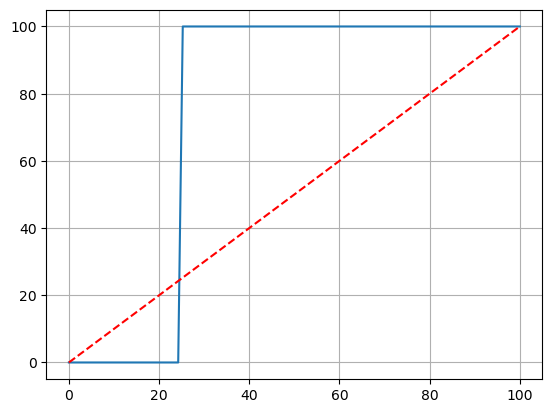

In [10]:
simul(normal, 'testing2', 0.25,0)